In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'../../data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'../../data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,value='value',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                time_budget= 60,  metric= 'r2');

In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [11]:
automl.best_result

{'pred_time': 3.2893284594164734e-06,
 'wall_clock_time': 43.064547061920166,
 'metric_for_logging': {'pred_time': 3.2893284594164734e-06},
 'val_loss': 0.14506105728824534,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 7.887611150741577}

In [12]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,0.0,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,0.0,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,0.0,0.821371,0.910685,0.962915,all


In [16]:
df1a

,rowid,date,rh2m,tcc,ssrd,sp,blh,u10,v10,t2m,d2m,tp,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,91.884130,0.650958,-1.164153e-10,102252.303312,384.209053,-2.720528,1.545010,278.394725,277.183465,0.000008,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,92.715877,0.603699,-1.164153e-10,102211.168636,353.220263,-2.308789,1.282742,277.772899,276.695430,0.000002,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,93.485560,0.710378,-1.164153e-10,102174.855967,255.911846,-2.216471,0.758730,277.463419,276.505662,0.000005,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,93.906363,0.837765,-1.164153e-10,102166.786485,191.375560,-1.928623,0.509013,277.305813,276.412816,0.000005,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,93.696878,0.819103,-1.164153e-10,102142.578039,151.780210,-1.700043,0.607069,277.478941,276.553051,0.000003,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,90.582979,0.918149,-5.820766e-11,99902.506413,476.945688,1.380939,-1.945195,273.557442,272.197565,0.000000,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,89.939908,0.839639,-5.820766e-11,99947.625909,486.665851,0.987925,-2.102732,273.629146,272.171041,0.000000,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,90.422188,0.739354,-5.820766e-11,100000.215520,489.355002,0.681543,-1.933668,273.470592,272.087408,0.000000,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,95.088677,0.643753,-5.820766e-11,100042.844978,40.714872,1.020793,-0.583816,272.926062,272.235319,0.000000,17.1,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=ad.normalise(automl, df1a,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-17 12:22:23 : Sampling and predicting 300 times...
Execution time: 4.88 seconds


In [18]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,22.691853
2020-01-01 01:00:00,43.2,23.972637
2020-01-01 02:00:00,43.0,22.323811
2020-01-01 03:00:00,42.8,22.265211
2020-01-01 04:00:00,36.8,22.704557
...,...,...
2020-12-31 19:00:00,11.7,11.442335
2020-12-31 20:00:00,11.0,11.735866
2020-12-31 21:00:00,15.3,10.978892


In [14]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300)

2024-06-17 13:22:49 : Sampling and predicting 300 times...


In [15]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,22.691853
2020-01-01 01:00:00,43.2,23.972637
2020-01-01 02:00:00,43.0,22.323811
2020-01-01 03:00:00,42.8,22.265211
2020-01-01 04:00:00,36.8,22.704557
...,...,...
2020-12-31 19:00:00,11.7,11.442335
2020-12-31 20:00:00,11.0,11.735866
2020-12-31 21:00:00,15.3,10.978892


In [21]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,0.0,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,0.0,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,0.0,0.821371,0.910685,0.962915,all


In [22]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300,n_models=10)

2024-06-17 12:24:34 : Sampling and predicting 300 times...
2024-06-17 12:25:38 : Sampling and predicting 300 times...
2024-06-17 12:26:50 : Sampling and predicting 300 times...
2024-06-17 12:27:55 : Sampling and predicting 300 times...
2024-06-17 12:29:04 : Sampling and predicting 300 times...
2024-06-17 12:30:32 : Sampling and predicting 300 times...
2024-06-17 12:31:37 : Sampling and predicting 300 times...
2024-06-17 12:34:10 : Sampling and predicting 300 times...
2024-06-17 12:35:52 : Sampling and predicting 300 times...
2024-06-17 12:37:06 : Sampling and predicting 300 times...


In [23]:
df_dew

,Observed,Normalised_979812,Normalised_378829,Normalised_120727,Normalised_541475,Normalised_488292,Normalised_813334,Normalised_90992,Normalised_206312,Normalised_81536,Normalised_774600,mean,std,median,lower_bound,upper_bound,weighted
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.683573,15.358637,17.738708,14.164893,14.753011,14.625942,14.171614,20.263724,14.997868,13.251017,16.000899,2.630261,14.875439,13.456639,20.589107,15.784026
2020-01-01 01:00:00,43.2,19.990526,13.762974,18.275362,13.573306,14.784374,13.103605,13.467204,17.029330,14.170310,12.860702,15.101769,2.460147,13.966642,12.915356,19.604614,15.041641
2020-01-01 02:00:00,43.0,19.777561,13.301917,18.299864,13.076367,14.388332,12.625865,13.447265,17.422204,13.925427,12.677536,14.894234,2.603917,13.686346,12.637491,19.445079,14.833704
2020-01-01 03:00:00,42.8,19.176115,13.834456,18.179382,13.687832,12.918735,13.628104,12.924223,16.714287,13.354595,12.861981,14.727971,2.371792,13.657968,12.874751,18.951850,14.676544
2020-01-01 04:00:00,36.8,19.746719,13.634006,16.906803,14.643508,14.102379,13.496162,13.623596,17.359149,13.307068,13.002398,14.982179,2.249465,13.868193,13.070949,19.209516,14.826000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.889203,10.097784,14.038887,12.485026,9.844484,10.515366,10.141360,13.817638,10.404770,9.597296,11.383181,1.729587,10.460068,9.652914,13.989106,11.249494
2020-12-31 20:00:00,11.0,12.714019,9.817205,13.587616,12.878751,10.506858,10.179301,10.102044,14.771630,10.045538,9.628204,11.423117,1.871218,10.343080,9.670730,14.505227,11.177127
2020-12-31 21:00:00,15.3,13.056449,9.815339,13.269509,12.939261,10.011098,10.051037,9.719709,13.863711,9.600322,9.535925,11.186236,1.826290,10.031067,9.550414,13.730016,10.980867


# Time series decomposition

In [25]:
df_dewc, mod_stats=ad.ts_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random',time_budget=60,
                  n_samples=300,fraction=0.75)

2024-06-17 13:29:43 : Sampling and predicting 300 times...
2024-06-17 13:29:55 : Sampling and predicting 300 times...
2024-06-17 13:30:00 : Sampling and predicting 300 times...
2024-06-17 13:30:06 : Sampling and predicting 300 times...
2024-06-17 13:30:12 : Sampling and predicting 300 times...


In [27]:
df_dewc

,Observed,all,date_unix,day_julian,weekday,hour,Deweathered
date,,,,,,,
2020-01-01 00:00:00,58.1,9.751520,9.952387,3.550034,1.508663,0.105612,15.880534
2020-01-01 01:00:00,43.2,9.210168,10.492829,3.775146,1.545491,-0.330184,15.705767
2020-01-01 02:00:00,43.0,8.967413,10.298703,3.321353,1.437177,-0.442343,14.594619
2020-01-01 03:00:00,42.8,9.074336,10.297236,3.375119,1.405656,-0.508381,14.656283
2020-01-01 04:00:00,36.8,8.135646,11.147120,3.333564,1.275926,-0.333831,14.570741
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.123603,8.436266,0.564774,-0.090922,0.020623,9.066661
2020-12-31 20:00:00,11.0,8.672057,8.904766,0.747915,-0.123766,-0.058926,9.154363
2020-12-31 21:00:00,15.3,8.409130,8.981301,0.884060,-0.080725,-0.083255,9.122827


In [26]:
df_dewc, mod_stats=ad.met_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-17 12:39:18 : Sampling and predicting 100 times...
2024-06-17 12:39:19 : Sampling and predicting 100 times...
2024-06-17 12:39:20 : Sampling and predicting 100 times...
2024-06-17 12:39:21 : Sampling and predicting 100 times...
2024-06-17 12:39:22 : Sampling and predicting 100 times...
2024-06-17 12:39:23 : Sampling and predicting 100 times...
2024-06-17 12:39:24 : Sampling and predicting 100 times...
2024-06-17 12:39:25 : Sampling and predicting 100 times...
2024-06-17 12:39:25 : Sampling and predicting 100 times...
2024-06-17 12:39:26 : Sampling and predicting 100 times...
2024-06-17 12:39:27 : Sampling and predicting 100 times...


In [27]:
df_dewc

,Observed,all,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m
date,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,9.330984,-0.864849,2.179255,-1.299386,-0.756327,1.078839,-0.485357,0.224088,-0.217497,-0.696815,-0.209679
2020-01-01 01:00:00,43.2,8.582710,0.146269,1.897205,-0.400023,-0.212859,1.408442,-0.381534,0.322466,0.071175,-0.946568,0.501997
2020-01-01 02:00:00,43.0,9.128659,2.065232,2.477948,-1.659558,-1.823794,0.645703,-0.035479,0.385631,0.398967,-0.519676,0.701325
2020-01-01 03:00:00,42.8,9.111122,2.901490,2.824591,-1.029120,-2.183031,0.429550,-0.430367,0.034553,0.317085,-0.480619,0.899776
2020-01-01 04:00:00,36.8,8.817081,3.370459,1.735567,-0.519255,-1.382617,0.294492,-0.533347,0.010614,1.183806,-0.414104,0.290309
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.684720,-1.105435,-0.673699,-0.331464,0.021960,-0.573958,-0.010694,0.068334,-0.105239,-0.460916,-0.693539
2020-12-31 20:00:00,11.0,8.946051,-0.962349,-0.397224,-0.498111,0.294071,-0.690880,0.097825,0.035593,-0.181589,-0.400839,-0.547183
2020-12-31 21:00:00,15.3,8.064856,0.022491,-0.122913,-0.644466,0.244905,-0.723903,0.234046,0.067778,-0.464972,-0.389915,-0.395027


# Rolling weather normalisation

In [28]:
df_dewc1, mod_stats=ad.rolling_dew(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-06-17 12:40:29 : Sampling and predicting 100 times...
2024-06-17 12:40:29 : Sampling and predicting 100 times...
2024-06-17 12:40:29 : Sampling and predicting 100 times...
2024-06-17 12:40:30 : Sampling and predicting 100 times...
2024-06-17 12:40:30 : Sampling and predicting 100 times...
2024-06-17 12:40:30 : Sampling and predicting 100 times...
2024-06-17 12:40:31 : Sampling and predicting 100 times...
2024-06-17 12:40:31 : Sampling and predicting 100 times...
2024-06-17 12:40:31 : Sampling and predicting 100 times...
2024-06-17 12:40:32 : Sampling and predicting 100 times...
2024-06-17 12:40:32 : Sampling and predicting 100 times...
2024-06-17 12:40:32 : Sampling and predicting 100 times...
2024-06-17 12:40:32 : Sampling and predicting 100 times...
2024-06-17 12:40:33 : Sampling and predicting 100 times...
2024-06-17 12:40:33 : Sampling and predicting 100 times...
2024-06-17 12:40:33 : Sampling and predicting 100 times...
2024-06-17 12:40:34 : Sampling and predicting 100 times.

In [29]:
df_dewc1.head()

,Observed,Rolling_0,Rolling_1,Rolling_2,Rolling_3,Rolling_4,Rolling_5,Rolling_6,Rolling_7,Rolling_8,...,Rolling_29,Rolling_30,Rolling_31,Rolling_32,Rolling_33,Rolling_34,Rolling_35,Rolling_36,Rolling_37,Rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,18.719059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,19.291945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,19.010509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,19.094627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,18.019218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

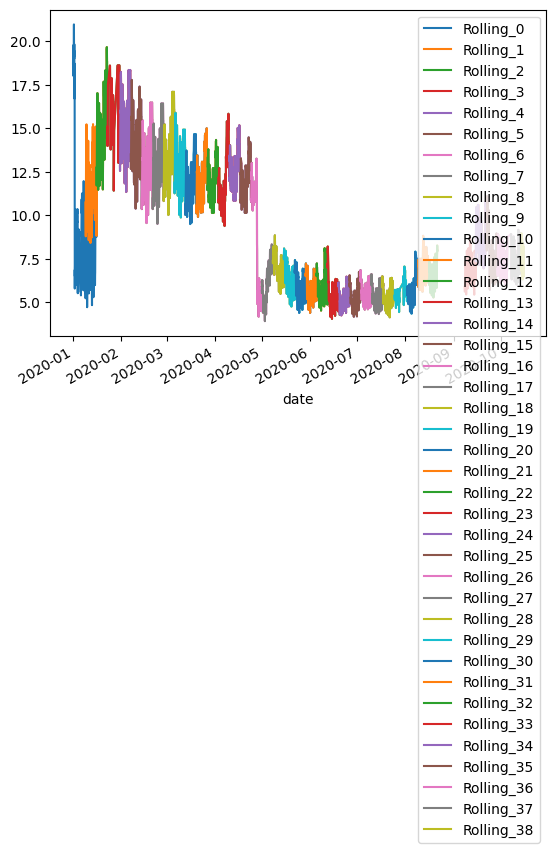

In [30]:
df_dewc1.iloc[:,1:].plot()

In [31]:
df_dewc2, mod_stats=ad.met_rolling(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-17 12:41:43 : Sampling and predicting 100 times...
2024-06-17 12:41:44 : Sampling and predicting 100 times...
2024-06-17 12:41:45 : Sampling and predicting 100 times...
2024-06-17 12:41:45 : Sampling and predicting 100 times...
2024-06-17 12:41:45 : Sampling and predicting 100 times...
2024-06-17 12:41:46 : Sampling and predicting 100 times...
2024-06-17 12:41:46 : Sampling and predicting 100 times...
2024-06-17 12:41:47 : Sampling and predicting 100 times...
2024-06-17 12:41:47 : Sampling and predicting 100 times...
2024-06-17 12:41:47 : Sampling and predicting 100 times...
2024-06-17 12:41:48 : Sampling and predicting 100 times...
2024-06-17 12:41:48 : Sampling and predicting 100 times...
2024-06-17 12:41:48 : Sampling and predicting 100 times...
2024-06-17 12:41:49 : Sampling and predicting 100 times...
2024-06-17 12:41:49 : Sampling and predicting 100 times...
2024-06-17 12:41:50 : Sampling and predicting 100 times...
2024-06-17 12:41:50 : Sampling and predicting 100 times.

In [32]:
df_dewc2.head()

,Observed,Normalised,EMI_mean_14,EMI_std_14,MET_short,MET_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.289709,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.582930,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,22.667221,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,23.204002,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.390478,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

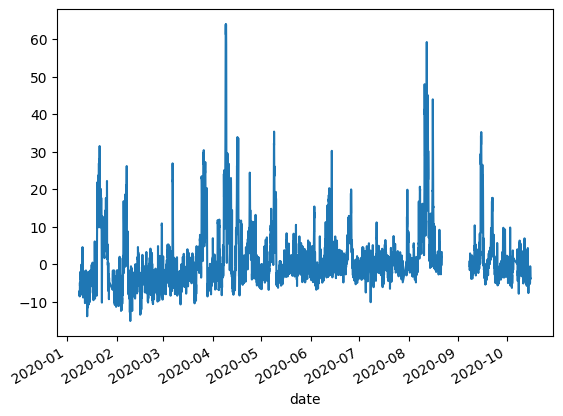

In [33]:
df_dewc2['MET_short'].plot()

<Axes: xlabel='date'>

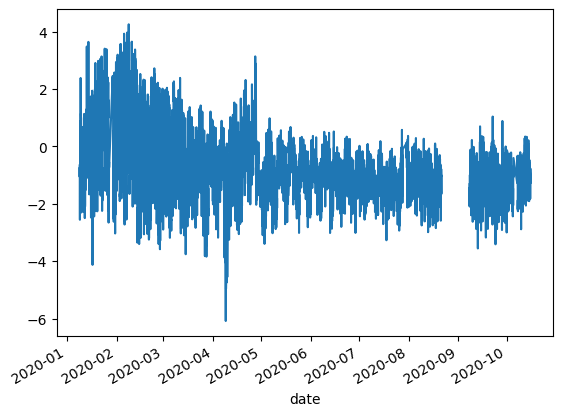

In [34]:
df_dewc2['MET_season'].plot()

# Partial Dependence Plots

In [11]:
import normet.pdp as pdp

In [37]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [38]:
df1a

,rowid,date,rh2m,tcc,ssrd,sp,blh,u10,v10,t2m,d2m,tp,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,91.884130,0.650958,-1.164153e-10,102252.303312,384.209053,-2.720528,1.545010,278.394725,277.183465,0.000008,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,92.715877,0.603699,-1.164153e-10,102211.168636,353.220263,-2.308789,1.282742,277.772899,276.695430,0.000002,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,93.485560,0.710378,-1.164153e-10,102174.855967,255.911846,-2.216471,0.758730,277.463419,276.505662,0.000005,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,93.906363,0.837765,-1.164153e-10,102166.786485,191.375560,-1.928623,0.509013,277.305813,276.412816,0.000005,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,93.696878,0.819103,-1.164153e-10,102142.578039,151.780210,-1.700043,0.607069,277.478941,276.553051,0.000003,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,90.582979,0.918149,-5.820766e-11,99902.506413,476.945688,1.380939,-1.945195,273.557442,272.197565,0.000000,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,89.939908,0.839639,-5.820766e-11,99947.625909,486.665851,0.987925,-2.102732,273.629146,272.171041,0.000000,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,90.422188,0.739354,-5.820766e-11,100000.215520,489.355002,0.681543,-1.933668,273.470592,272.087408,0.000000,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,95.088677,0.643753,-5.820766e-11,100042.844978,40.714872,1.020793,-0.583816,272.926062,272.235319,0.000000,17.1,1.609452e+09,366,4,22,training


In [39]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=pdp.pdp_all(automl,df1a,feature_names=all_features)

In [40]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088


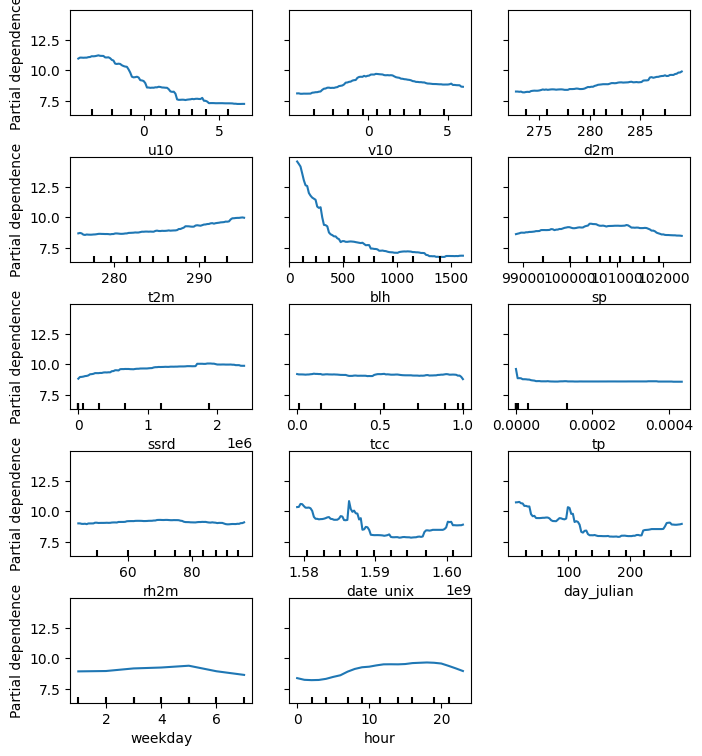

In [42]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,figsize=(8,9),hspace=0.4)

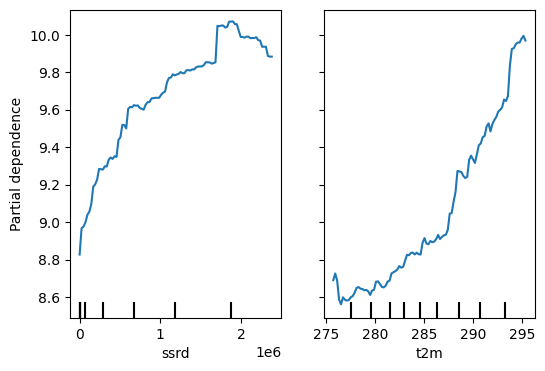

In [44]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='average',figsize=(6,4))

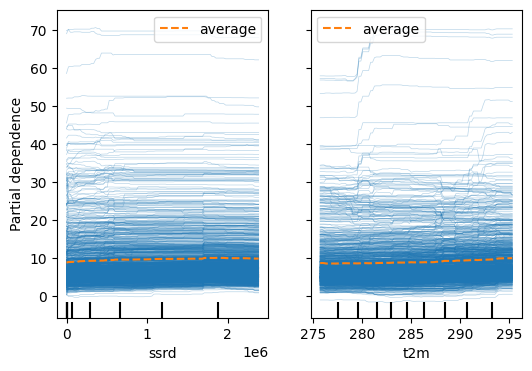

In [45]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='both',figsize=(6,4))

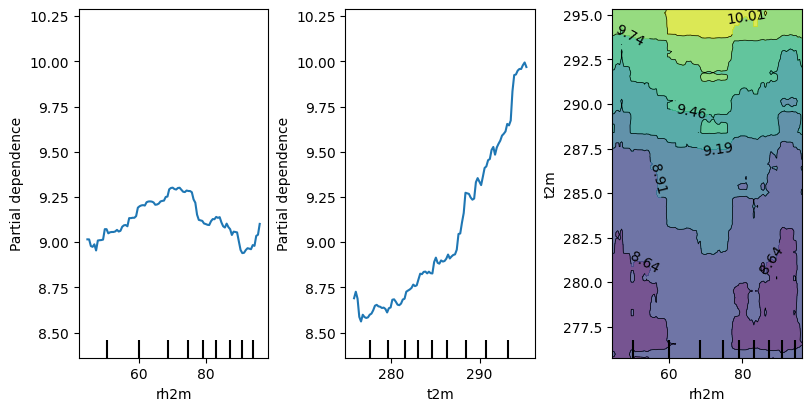

In [46]:
pdp.pdp_interaction(automl,df1a,variables=['rh2m','t2m',('rh2m','t2m')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

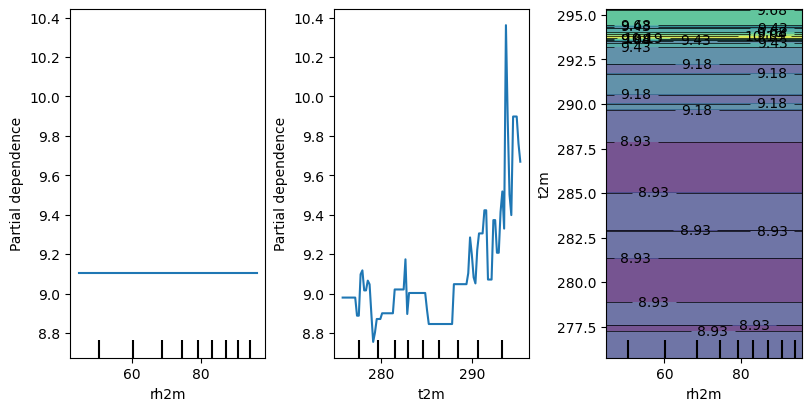

In [13]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp.pdp_nointeraction(automl,df1a,feature_names=all_features,variables=['rh2m','t2m',('rh2m','t2m')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

# Change Points Detection

In [16]:
df_dew.head()

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,22.691853
2020-01-01 01:00:00,43.2,23.972637
2020-01-01 02:00:00,43.0,22.323811
2020-01-01 03:00:00,42.8,22.265211
2020-01-01 04:00:00,36.8,22.704557


In [22]:
import normet.cpd as cpd
import matplotlib.pyplot as plt

In [78]:
pt=cpd.cpd_rupture(df_dewc.resample('1D').mean(),'date_unix',window=14, n=5)

In [79]:
pt

DatetimeIndex(['2020-02-14', '2020-03-10', '2020-03-20', '2020-04-24',
               '2020-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

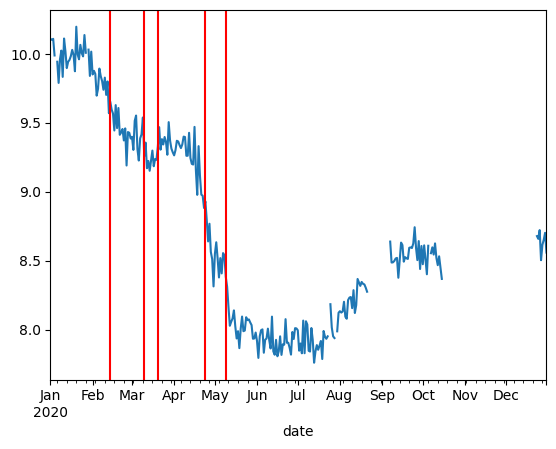

In [80]:
fig,ax=plt.subplots()
df_dewc['date_unix'].resample('1D').mean().plot()
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')